In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from tf.keras.models import Sequential # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau

# ModelCheckpoint

In [3]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.clustering import TimeSeriesKMeans

In [4]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
# import pandas as pd

# # 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
# # 이렇게 해야 데이터를 분석할 때 출력해서 확인하기 편합니다.
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [6]:
# train = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/train.csv')
# test = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/test.csv')

In [7]:
weather_time = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/인천_시간별_기상자료.csv',encoding='euc-kr',index_col='일시',parse_dates=True)
del weather_time['지점']

In [8]:
# for k in range(1,len(train.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     train_median=train.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=train.loc[ train.iloc[:,k].isnull()==False ][ train.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if train.iloc[i,k]>=train_median: #현재 index에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             train.iloc[ i : i+j+1 , k] = train.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [9]:
# for k in range(1,len(test.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     test_median=test.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=test.loc[ test.iloc[:,k].isnull()==False ][ test.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if test.iloc[i,k]>=test_median: #현재 indetestx에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             test.iloc[ i : i+j+1 , k] = test.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [10]:
# train['Time'] = train['Time'].apply(pd.to_datetime)
# train.set_index('Time',inplace=True)

# test['Time'] = test['Time'].apply(pd.to_datetime)
# test.set_index('Time',inplace=True)

In [11]:
# train_sample = train['2018-02-15':]
# train_sample = train_sample.interpolate(method='values')

# test_sample = test['2018-02-15':]
# test_sample = test_sample.interpolate(method='values')

In [12]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# train_sample.loc[:,train_sample.isnull().sum() >= 1].columns

In [13]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# test_sample.loc[:,test_sample.isnull().sum() >= 1].columns

In [14]:
# train_sample.drop(['X4', 'X127', 'X9', 'X65', 'X54', 'X13', 'X53', 'X24', 'X17', 'X14',
#        'X48', 'X2', 'X19', 'X36', 'X28', 'X63', 'X38', 'X39', 'X8', 'X64',
#        'X29', 'X57', 'X705', 'X71', 'X3', 'X27', 'X22', 'X21', 'X118', 'X6',
#        'X45', 'X40', 'X66', 'X52', 'X12', 'X49', 'X1', 'X33', 'X60', 'X46',
#        'X963', 'X56', 'X15', 'X11', 'X25', 'X34', 'X23', 'X58'], axis=1, inplace=True)

# test_sample.drop(['X26', 'X16', 'X7', 'X18', 'X41', 'X55', 'X5', 'X43', 'X59', 'X10',
#        'X62', 'X61', 'X32', 'X31', 'X30', 'X51', 'X35', 'X44', 'X37', 'X42',
#        'X50', 'X47', 'X20'],axis=1,inplace=True)

In [15]:
# train_sample.to_csv('train_sample')
# test_sample.to_csv('test_sample')

In [16]:
train_sample = pd.read_csv('train_sample',index_col='Time',parse_dates=True)
test_sample = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

> 입력신호 추가

In [17]:
train_sample['temp'] = weather_time['기온(°C)']['2018-02-15':] 
train_sample['humidity'] = weather_time['습도(%)']['2018-02-15':] 
train_sample[['temp','humidity']] = train_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
train_sample['Hour'] = train_sample.index.hour
train_sample['DayOfWeek'] = train_sample.index.dayofweek


test_sample['temp'] = weather_time['기온(°C)']['2018-02-15':]
test_sample['humidity'] = weather_time['습도(%)']['2018-02-15':] 
test_sample[['temp','humidity']] = test_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
test_sample['Hour'] = test_sample.index.hour
test_sample['DayOfWeek'] =  test_sample.index.dayofweek

In [18]:
# 공휴일 목록
holiday_list=['2018-02-15','2018-02-16','2018-02-17','2018-03-01','2018-05-05','2018-05-07','2018-05-22','2018-06-06','2018-06-13']

# 토요일/일요일 

a= train_sample.resample('D').sum()['2018-02-17':].index
b= train_sample.resample('D').sum()['2018-02-19':].resample('B').sum().index

list_a = []
for i in range(len(a.values)):
    list_a.append(a.values[i])
list_b = []
for i in range(len(b.values)):
    list_b.append(b.values[i])

list_tmp = []
for i in list_a:
    if i not in list_b:
        list_tmp.append(i)
      
    
# list_tmp # 토요일/일요일
saturday_sunday = np.array(list_tmp) # 툐요일/일요일 index => ndarray

# # 주말목록 / 주말색인 구한 뒤 합침
for i in range(len(saturday_sunday)):
    holiday_list.append(str(saturday_sunday[i])[:10])

> Input 형식

>  (전체세대시간, 24시간, 2 )

In [19]:
from sklearn.preprocessing import MinMaxScaler

sc_train = MinMaxScaler() # trainSet scaler
sc_test = MinMaxScaler() # testSet scaler
sc_temp = MinMaxScaler() # temp scaler
sc_humidity = MinMaxScaler()
sc_DayOfWeek = MinMaxScaler()
sc_Hour = MinMaxScaler()


train_sample_sc = sc_train.fit_transform(train_sample.iloc[:,:-4])
test_sample_sc = sc_test.fit_transform(test_sample.iloc[:,:-4])
temp_sc = sc_temp.fit_transform(train_sample[['temp']])
humidity_sc = sc_humidity.fit_transform(train_sample[['humidity']])
DayOfWeek_sc = sc_DayOfWeek.fit_transform(train_sample[['DayOfWeek']])
hour_sc = sc_Hour.fit_transform(train_sample[['Hour']])


train_sample_sc = np.concatenate((train_sample_sc, temp_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, hour_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, humidity_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, DayOfWeek_sc), axis=1)



test_sample_sc = np.concatenate((test_sample_sc, temp_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, hour_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, humidity_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, DayOfWeek_sc), axis=1)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
train_sample = pd.DataFrame(train_sample_sc, columns=train_sample.columns,index=train_sample.index)
test_sample = pd.DataFrame(test_sample_sc, columns=test_sample.columns,index=test_sample.index)

In [21]:
train_sample['holiDay'] = 0 # holiday feature 추가 / 우선 0으로 

for i in range(len(train_sample)):
    if str(train_sample.index[i])[:10] in holiday_list :
        train_sample['holiDay'].iloc[i] = 1 # 쉬는날이면 1
    else:
        train_sample['holiDay'].iloc[i] = 0 # 쉬는날 아니면 0
        
# 같은방법으로 test_sample도

test_sample['holiDay'] = 0 # holiday feature 추가 / 우선 0으로 

for i in range(len(test_sample)):
    if str(test_sample.index[i])[:10] in holiday_list :
        test_sample['holiDay'].iloc[i] = 1 # 쉬는날이면 1
    else:
        test_sample['holiDay'].iloc[i] = 0 # 쉬는날 아니면 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
train_sample.to_csv('train_sample_forecast_시간별')
test_sample.to_csv('test_sample_forecast_시간별')

In [23]:
train_sample = pd.read_csv('train_sample_forecast_시간별',index_col='Time',parse_dates=True) # scaling 된거
test_sample = pd.read_csv('test_sample_forecast_시간별',index_col='Time',parse_dates=True)

In [24]:
shift_step = 24

In [25]:
tmp_list = [] 
for i in train_sample.columns[:-5]:
    tmp_list.append(train_sample[[i,'temp','DayOfWeek','holiDay','Hour','humidity']].values[:-shift_step].reshape(135,24,6)) 

to_formatted_x = np.array(tmp_list)

In [26]:
res_x = to_formatted_x.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],24,6)

res_x.shape

(169020, 24, 6)

In [27]:
for_shifting_y = train_sample.shift(-24)
# for_shifting_y=for_shifting_y.dropna()

tmp_shift_list = []
for i in train_sample.columns[:-5]:
    tmp_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(135,24,1))

to_formatted_y = np.array(tmp_shift_list)

In [28]:
res_y = to_formatted_y.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],24,1)

res_y.shape

(169020, 24, 1)

In [29]:
############################################### TEST DATA #############################################################

In [30]:
tmp_test_list = [] 
for i in test_sample.columns[:-5]:
    tmp_test_list.append(test_sample[[i,'temp','DayOfWeek','holiDay','Hour','humidity']].values[:-shift_step].reshape(135,24,6)) 

to_formatted_test_x = np.array(tmp_test_list)

In [31]:
res_test_x = to_formatted_test_x.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],24,6)

res_test_x.shape

(23895, 24, 6)

In [32]:
for_shifting_y = test_sample.shift(-24)

tmp_test_shift_list = []
for i in test_sample.columns[:-5]:
    tmp_test_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(135,24,1))

to_formatted_test_y = np.array(tmp_test_shift_list)

In [33]:
# to_formatted_test_y.shape

In [34]:
res_test_y = to_formatted_test_y.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],24,1)

res_test_y.shape

(23895, 24, 1)

In [35]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
from keras.layers import TimeDistributed
K.clear_session()

model = Sequential() # Sequeatial Model 
model.add(LSTM(64, input_shape=(24, 6),return_sequences=True)) # (timestep, feature)
model.add(TimeDistributed(Dense(1, activation="linear")))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 64)            18176     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 1)             65        
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 학습
early_stop = EarlyStopping(monitor='loss',patience=4, verbose=1)

history = model.fit(res_x,res_y,epochs=15,batch_size=1024,verbose=1,validation_split=0.2,shuffle=True,callbacks=[early_stop])


Train on 135216 samples, validate on 33804 samples
Epoch 1/15
135216/135216 [==============================] - 25s 182us/step - loss: 0.0149 - val_loss: 0.0130
Epoch 2/15
135216/135216 [==============================] - 24s 180us/step - loss: 0.0129 - val_loss: 0.0124
Epoch 3/15
135216/135216 [==============================] - 25s 182us/step - loss: 0.0125 - val_loss: 0.0121
Epoch 4/15
135216/135216 [==============================] - 25s 183us/step - loss: 0.0123 - val_loss: 0.0119
Epoch 5/15
135216/135216 [==============================] - 25s 182us/step - loss: 0.0122 - val_loss: 0.0120
Epoch 6/15
135216/135216 [==============================] - 25s 183us/step - loss: 0.0121 - val_loss: 0.0124
Epoch 7/15
135216/135216 [==============================] - 25s 186us/step - loss: 0.0120 - val_loss: 0.0117
Epoch 8/15
135216/135216 [==============================] - 25s 184us/step - loss: 0.0119 - val_loss: 0.0116
Epoch 9/15
135216/135216 [==============================] - 25s 187us/step -

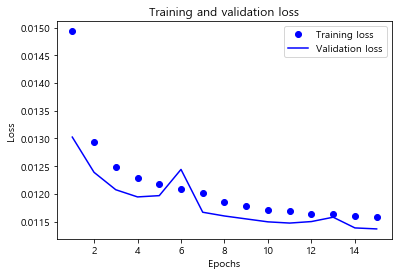

In [37]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
pred = model.predict(res_test_x)

In [39]:
## to inverse minmax scale

col_list = test_sample.columns.insert(0,'임시')
tt_index = test_sample['2018-02-16':'2018-06-30-23:00:00'].index

test_inverse_df = pd.DataFrame()

for i in range(1,len(test_sample.columns)-4):# temp col 제외
    tmp = i*3240
    tt = pred.reshape(573480 ,1)[tmp-3240:tmp]    
    test_inverse_df[col_list[i]] = tt.reshape(3240,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_test.inverse_transform(test_inverse_df)

In [40]:
# inverse minmax scale DataFrame 

res_test_df = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [41]:
# 예측한 결과물 DataFrame
# res_test_df

In [42]:
# 결과물과 원본 DataFrame 모두 inverse scaling 

In [43]:
test_none_scale = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

In [44]:
test_none_scale = test_none_scale.loc[:,:'X230']['2018-02-16':]

> 결과 체크

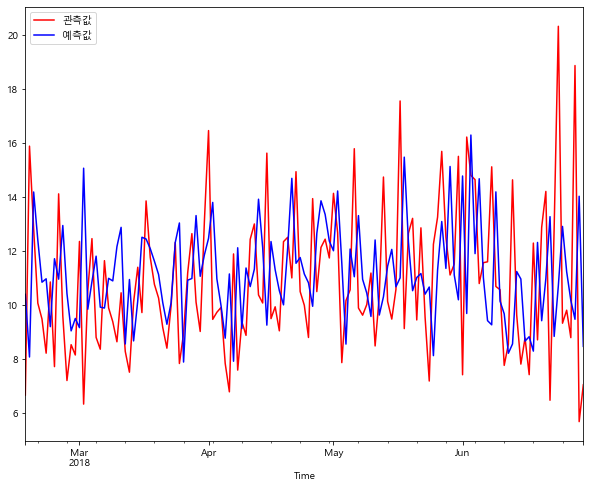

In [45]:
# 일별

test_none_scale['X303'].resample('D').sum().plot(figsize=(10,8),color='red',label='관측값')
res_test_df['X303'].resample('D').sum().plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()

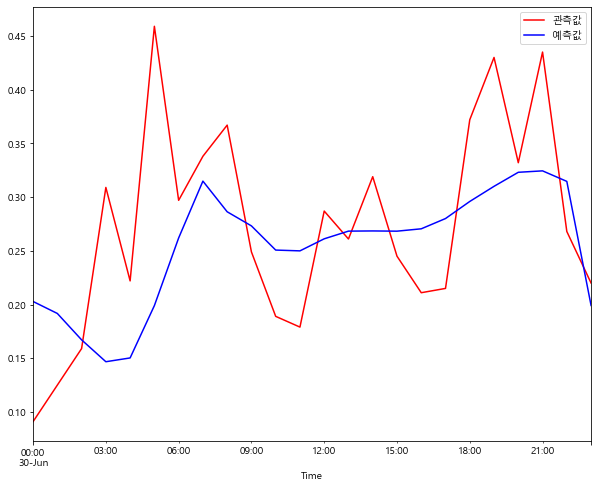

In [46]:
# 시간별 

test_none_scale['X241']['2018-06-30'].plot(figsize=(10,8),color='red',label='관측값')
res_test_df['X241']['2018-06-30'].plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()

In [47]:
#################### forecast#########################

In [84]:
forecast_test = pd.read_csv('forecast_test_time',index_col='Time',parse_dates=True)

In [85]:
from sklearn.preprocessing import MinMaxScaler

sc_test = MinMaxScaler() # testSet scaler
sc_temp = MinMaxScaler() # temp scaler
sc_humidity = MinMaxScaler()
sc_DayOfWeek = MinMaxScaler()
sc_Hour = MinMaxScaler()


forecast_test_sc = sc_test.fit_transform(forecast_test.iloc[:,:-4])
temp_sc = sc_temp.fit_transform(forecast_test[['temp']])
humidity_sc = sc_humidity.fit_transform(forecast_test[['humidity']])
DayOfWeek_sc = sc_DayOfWeek.fit_transform(forecast_test[['DayOfWeek']])
hour_sc = sc_Hour.fit_transform(forecast_test[['Hour']])


forecast_test_sc = np.concatenate((forecast_test_sc, temp_sc), axis=1)
forecast_test_sc = np.concatenate((forecast_test_sc, hour_sc), axis=1)
forecast_test_sc = np.concatenate((forecast_test_sc, humidity_sc), axis=1)
forecast_test_sc = np.concatenate((forecast_test_sc, DayOfWeek_sc), axis=1)


forecast_test = pd.DataFrame(forecast_test_sc, columns=forecast_test.columns,index=forecast_test.index)

forecast_test['holiDay'] = 0 # holiday feature 추가 / 우선 0으로 

for i in range(len(forecast_test)):
    if str(forecast_test.index[i])[:10] in holiday_list :
        forecast_test['holiDay'].iloc[i] = 1 # 쉬는날이면 1
    else:
        forecast_test['holiDay'].iloc[i] = 0 # 쉬는날 아니면 0

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
forecast_test.columns

Index(['X26', 'X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326',
       'X299',
       ...
       'X443', 'X347', 'X75', 'X107', 'X230', 'temp', 'humidity', 'Hour',
       'DayOfWeek', 'holiDay'],
      dtype='object', length=205)

In [87]:
tmp_test_list = [] 
for i in forecast_test.columns[:-4]:
    tmp_test_list.append(forecast_test[[i,'temp','DayOfWeek','holiDay','Hour','humidity']]['2018-06-30'].values) 

to_formatted_test_x = np.array(tmp_test_list)

In [88]:
forecast_x = to_formatted_test_x

In [89]:
pred = model.predict(forecast_x)

In [90]:
forecast_test.columns

Index(['X26', 'X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326',
       'X299',
       ...
       'X443', 'X347', 'X75', 'X107', 'X230', 'temp', 'humidity', 'Hour',
       'DayOfWeek', 'holiDay'],
      dtype='object', length=205)

In [93]:
## to inverse minmax scale

col_list = forecast_test.columns.insert(0,'임시')
tt_index = forecast_test['2018-06-30'].index # 07/01 

test_inverse_df = pd.DataFrame()

for i in range(1,len(forecast_test.columns)-4):# temp col 제외
    tmp = i*24
    tt = pred.reshape(4824,1)[tmp-24:tmp]    
    test_inverse_df[col_list[i]] = tt.reshape(24,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_test.inverse_transform(test_inverse_df)

In [94]:
# inverse minmax scale DataFrame 

res_forecast = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [100]:
res_forecast.to_csv('24시간 시간별 예측 결과') # 07/01 24시간